<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

[7498 4940 2918  920 6770 5582 1712 1536 3641 3310 2424 5375 3873 4023
 3873 2425 5585 2423 6235 4679 3214 4862 4086 5169 4590 4590 2913 2802
 5119 2927 3392 4150 3005 1543 3926 4590 2192 2162 2056 8714 2927 5501
 4792 7058 4649 2416 4940 6133 5119 6998 5041 3894 7907 5740 5259 7350
 3959 6691 4153 4332 2732 4763 4972 4648 3959 3750  985 8227 3926 1951
 5729 5611 2594 1683 7105 3959 1538 4866 3071 4972 6544 4451 2802 4120
 3544 2416 5870 3873 1446 6786 6269 5062 3322 4579 5119 3750 7436 7112
 4182 2425 1536 7733 2416 3053  920 3005 4154 1115 5259 5035 6460 6591
 1543 7458 6273 2115 7286 6133 2927 1712 5342 4940 7424 1543 1543 5611
 1162 7290 6779 5740 4833 6207 7498 2162 3190 6569 3194 4484 4917 1951
 2485 3915 4097 3820 3867 3820 3873 3894 6392 7458 4274 3053 3163 1589
 1996 6207 7058 4433 7410 4274 5531 5062 2927 3641 5169 2485 6904 7870
 3867 8227 2056 4563 4086 7286 4459 4451 4058 1536 2732 1005 7013 7429
 4067 7058 5986 5062 4326 2802 7363 4790 2416 4972 2425 2423 6207 4375
 2402 

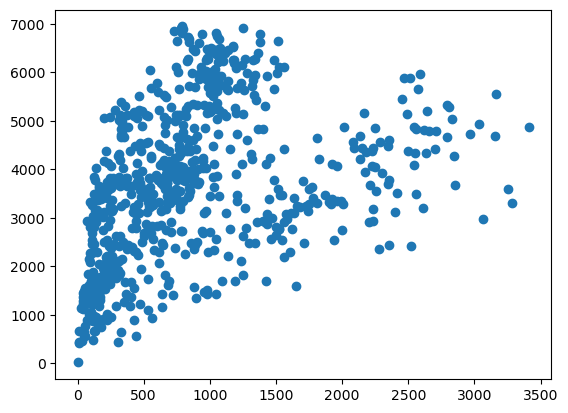

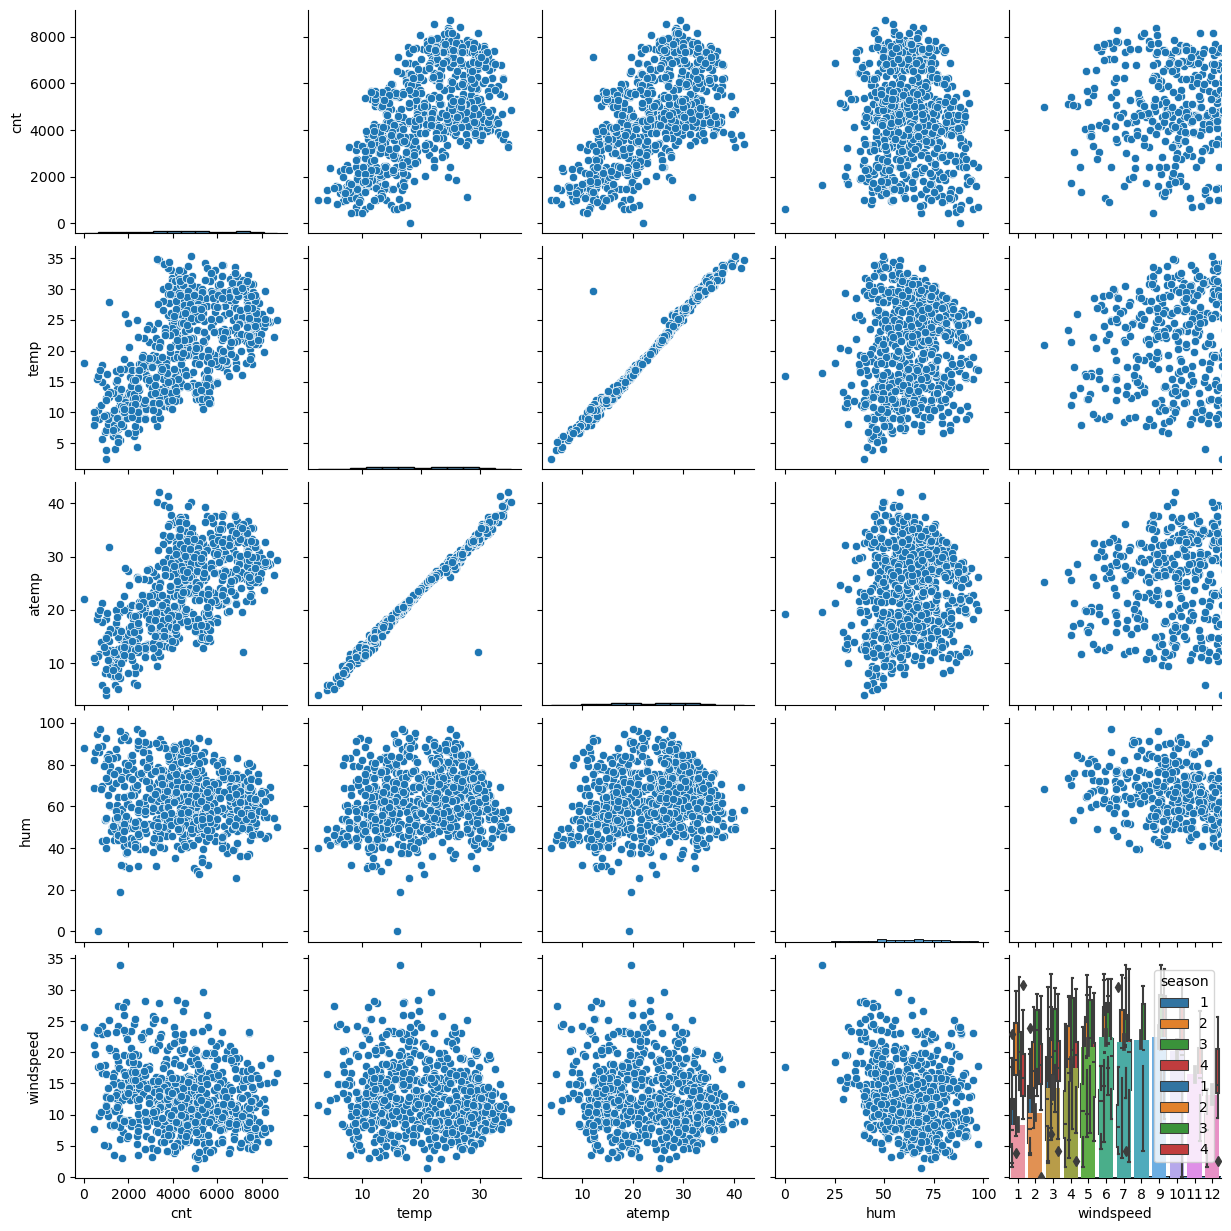

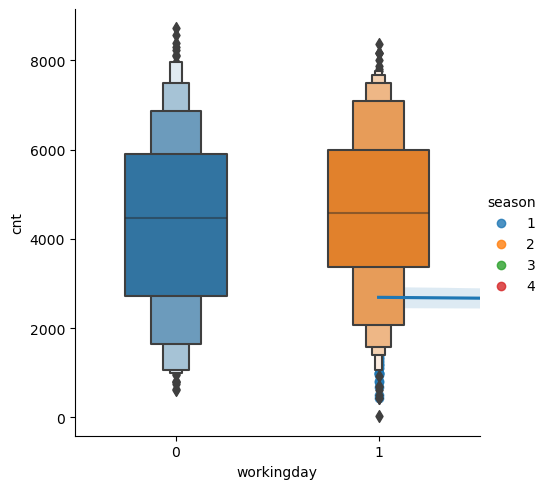

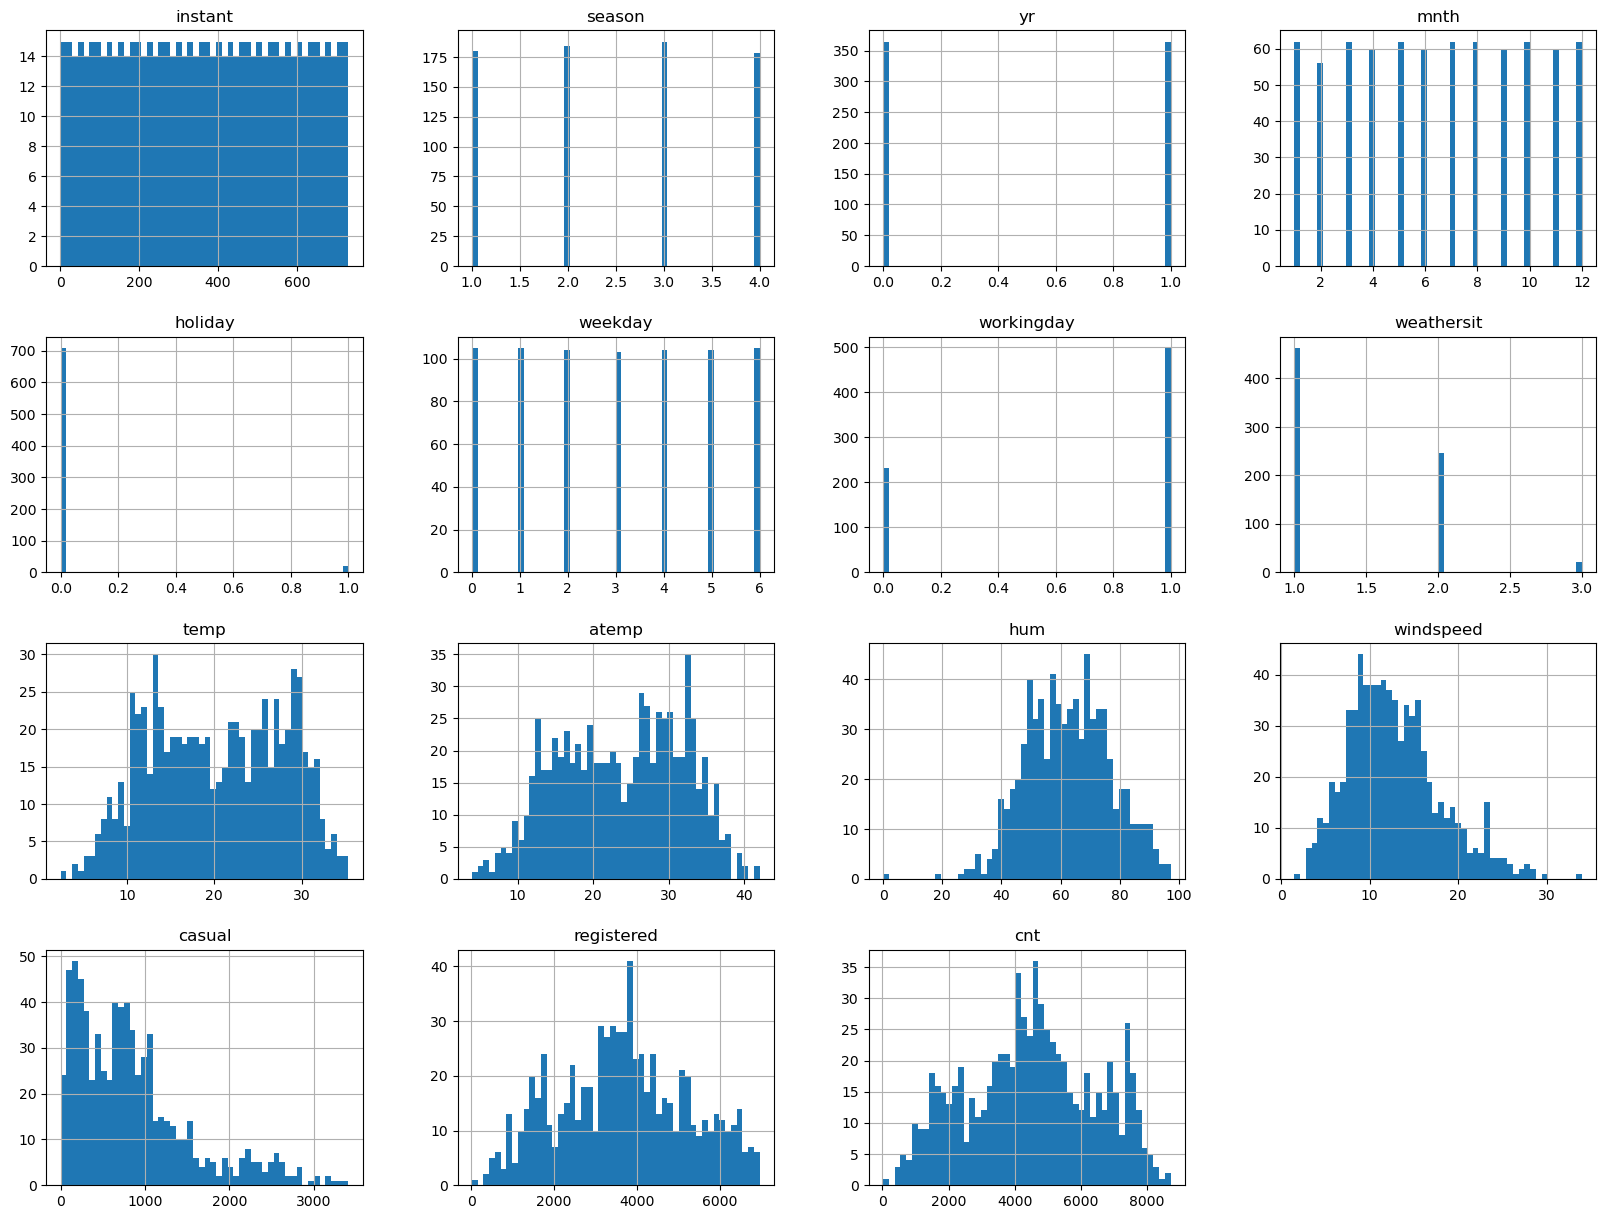

In [6]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_dir= 'c:\\Users\\Acer\\Downloads\\'
data=os.listdir(data_dir)
data=data_dir+'day (1).csv'
df=pd.read_csv(data)
df.info()
df_copy=df.copy()
df_copy
pd.DataFrame(df_copy)
df_copy.columns
matplotlib.pyplot.figure(num=None, figsize=[6.4, 4.8])
#graph ploting for data analysis
plt.scatter(x=df['casual'] , y=df['registered'])
sns.pairplot(data=df_copy, vars=['cnt', 'temp', 'atemp', 'hum','windspeed',])
sns.boxplot(data=df_copy,x='weekday',y='cnt',hue='season')
sns.boxplot(data=df_copy,x='mnth',y='cnt',hue='season')
sns.barplot(df_copy, x="mnth", y="cnt")
sns.lmplot(data=df_copy, x="mnth", y="cnt", hue="season")
sns.boxenplot(data=df_copy, x="workingday", y="cnt",width=.5)
df_copy.hist(bins=50, figsize=(20,15))


numerical=df_copy.select_dtypes(include=np.number).columns.tolist()
catogorical=df_copy.select_dtypes(include=np.object_).columns.tolist()

df_copy1=df_copy[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]


import calendar
df_copy['mnth'] = df_copy['mnth'].apply(lambda x: calendar.month_abbr[x])
df_copy.season = df_copy.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
df_copy.weathersit = df_copy.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
df_copy.weekday = df_copy.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

df_copy.head()
df_copy1=df_copy.drop(columns='instant',axis=1)
target='cnt'
df_copy = df_copy.drop('dteday', axis=1)
df_copy=df_copy.drop('instant',axis=1)
df_copy=df_copy.drop('yr',axis=1)


from sklearn.model_selection import train_test_split
train , test=train_test_split(df_copy, test_size=0.33, random_state=42)
numerical=df_copy.select_dtypes(include=np.number).columns.tolist()
catagorical=df_copy.select_dtypes(include='object').columns.tolist()

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train[catagorical])
encoder.fit(test[catagorical])
encoded_cols = list(encoder.get_feature_names_out(catagorical))
train[encoded_cols] = encoder.transform(train[catagorical])
test[encoded_cols] = encoder.transform(test[catagorical])

train[numerical+encoded_cols]

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini',max_leaf_nodes=None)
clf=clf.fit(train[numerical+encoded_cols],train[target])
pred=clf.predict(test[numerical+encoded_cols])

print(pred,test[target])
from sklearn.metrics import mean_squared_error
mean_squared_error(pred, test[target])

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
mae_knn = metrics.mean_absolute_error(pred,test[target]) 
print(mae_knn)

